**Inversi Linier - Gerak Peluru**

Contoh lain dari permasalahan linier adalah persamaan gerak peluru yang parabolik. Persamaan gerak parabolik tersebut jika ditulis adalah $h = h_0 + v_{0h}t - 1/2gt^2$. Nilai $h$ sebagai ketinggian kita anggap sebagai data, nilai $t$ sebagai waktu sebagai penyusun matriks **G**, sedangkan nilai atau model yang akan dicari adalah $h_0$ (posisi ketinggian awal), $v_{0h}$ (nilai kecepatan awal di sumbu $h$), dan $g$ (nilai percepatan gravitasi). Berikut diberikan data nilai waktu ($t$) dan ketinggian ($h$) dari pergerakan sebuah peluru dalam format *csv*.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

#data
data = pd.read_csv("peluru.csv",sep=";")
data.head()

,Waktu (s),Ketinggian (m)
0,1,105
1,2,180
2,3,270
3,4,325
4,5,380


In [2]:
t=np.asmatrix(data["Waktu (s)"]).T
h=np.asmatrix(data["Ketinggian (m)"]).T
print(t)
print(h)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[105]
 [180]
 [270]
 [325]
 [380]
 [425]
 [445]
 [490]
 [510]
 [510]]


Jika kita plot pada grafik akan menunjukkan tren parabolik sebagai berikut.

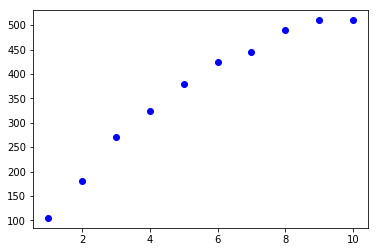

In [3]:
plt.plot(t,h,"bo")

In [4]:
#menyusun matrix G
b = np.ones([1,10])
#print(b)

c = -1/2*(np.square(t)).T
print(c)
g = np.concatenate((b,t.T,c)).T
print(g)

[[ -0.5  -2.   -4.5  -8.  -12.5 -18.  -24.5 -32.  -40.5 -50. ]]
[[  1.    1.   -0.5]
 [  1.    2.   -2. ]
 [  1.    3.   -4.5]
 [  1.    4.   -8. ]
 [  1.    5.  -12.5]
 [  1.    6.  -18. ]
 [  1.    7.  -24.5]
 [  1.    8.  -32. ]
 [  1.    9.  -40.5]
 [  1.   10.  -50. ]]


Masih menggunakan persamaan inversi *least square* yaitu **d** = **G** **m**. Kita telah memiliki data matriks **h** atau **d** dan matriks **g** atau matriks **G**. Dari kedua data tersebut kita akan mencari nilai **m** atau model (variabel $a$ dan $b$), $m = \left[G^T G \right]^{-1} \left[G^T d \right]$. Berikut perhitungannya.

In [5]:
#inversi
from numpy.linalg import inv
mls = np.dot(inv(np.dot(g.T,g)),np.dot(g.T,h))
print(mls)

#model hasil least square
h0 = mls[0]
print(h0)
v0h = mls[1]
print(v0h)
g = mls[2]
print(g)

[[13.66666667]
 [96.04545455]
 [ 9.24242424]]
[[13.66666667]]
[[96.04545455]]
[[9.24242424]]


Berbeda dengan inversi pada persamaan regresi linier yang hanya menghasilkan dua nilai model, dalam inversi kasus gerak peluru ini kita mendapatkan tiga nilai model. Berturut-turut adalah $h_0 = 13.66666667$ $m$, $v_{0h} = 96.04545455$ $m/s$, $g = 9.24242424$ $m/s^2$. Ketiga nilai ini kita masukkan ke dalam persamaan gerak peluru $h = h_0 + v_{0h}t - 1/2gt^2$ , menghasilkan nilai $h$ $prediksi$.

[[105.09090909]
 [187.27272727]
 [260.21212121]
 [323.90909091]
 [378.36363636]
 [423.57575758]
 [459.54545455]
 [486.27272727]
 [503.75757576]
 [512.        ]]


Text(0,0.5,'Ketinggian (h)')

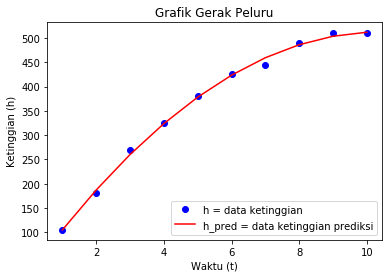

In [6]:
#data prediksi
h_pred = h0+(v0h*t.T)-(1/2*g*(np.square(t).T))
print(h_pred.T)


plt.plot(t,h,"bo", label='h = data ketinggian')
plt.plot(t,h_pred.T,"red", label='h_pred = data ketinggian prediksi')
plt.legend()
plt.title("Grafik Gerak Peluru")
plt.xlabel("Waktu (t)")
plt.ylabel("Ketinggian (h)")

Kita juga dapat menghitung selisih antara data asli dan data prediksi untuk melihat seberapa jauh *error* data prediksi.

In [7]:
#selisih data asli dan data prediksi
np.subtract(h_pred.T,h)

matrix([[ 0.09090909],
        [ 7.27272727],
        [-9.78787879],
        [-1.09090909],
        [-1.63636364],
        [-1.42424242],
        [14.54545455],
        [-3.72727273],
        [-6.24242424],
        [ 2.        ]])